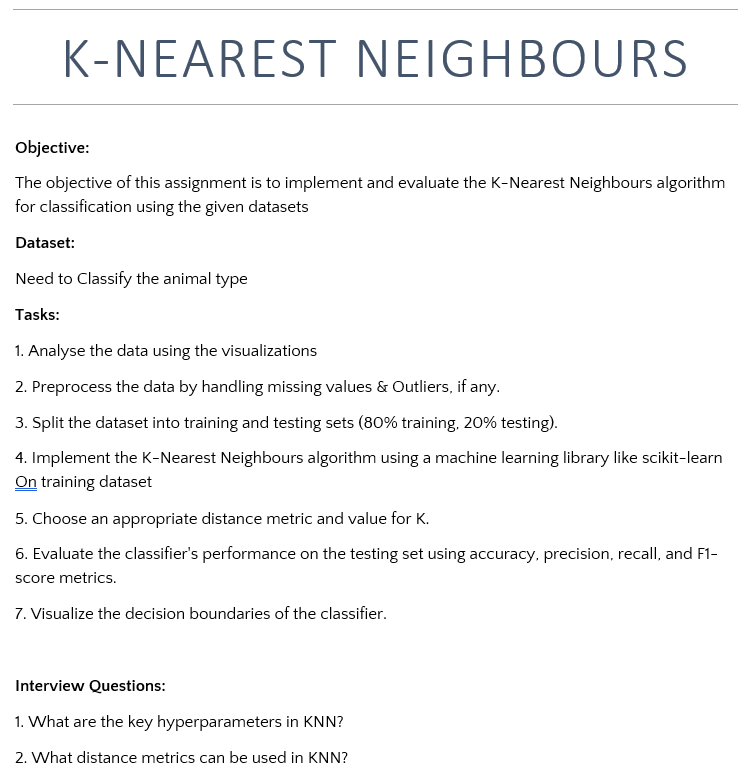

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
df = pd.read_csv('Zoo.csv')
df.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator   
0    aardvark     1         0     0     1         0        0         1  \
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize   
0        1         1         1         0     0     4     0         0        1  \
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [27]:
df.describe()

hair    feathers        eggs        milk    airborne     aquatic   
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  \
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins   
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000  \
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [28]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [29]:
#The Animal name column is not helpul in this analusis therefore drop that column

df.drop(columns='animal name', inplace = True)

In [30]:
#Check missing values
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

No missing data nor any columns having multiple data types

In [31]:
#Duplicate rows
df.duplicated().sum()

42

In [32]:
df[df.duplicated()]

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed   
3       1         0     0     1         0        0         1        1  \
5       1         0     0     1         0        0         0        1   
8       0         0     1     0         0        1         1        1   
10      1         0     0     1         0        0         1        1   
12      0         0     1     0         0        1         1        1   
17      1         0     0     1         0        0         0        1   
20      0         1     1     0         1        0         0        0   
22      1         0     0     1         0        0         0        1   
28      1         0     0     1         0        0         0        1   
31      1         0     0     1         0        0         0        1   
37      0         1     1     0         1        0         1        0   
38      0         0     1     0         0        1         1        1   
44      1         0     0     1         0        0         1        1   
45      1         0     0     1         0        0         1        1   
46      0         0     1     0         0        1         1        0   
47      1         0     0     1         0        0         1        1   
50      1         0     0     1         0        0         1        1   
51      1         0     1     0         1        0         0        0   
54      1         0     0     1         0        0         1        1   
55      1         0     0     1         0        0         0        1   
57      0         1     1     0         1        0         0        0   
59      0         1     1     0         1        0         0        0   
60      0         0     1     0         0        1         1        1   
61      0         0     1     0         0        1         1        1   
64      1         0     0     1         0        0         1        1   
65      1         0     0     1         0        0         0        1   
66      0         0     0     1         0        1         1        1   
67      1         0     0     1         0        0         1        1   
69      1         0     0     1         0        0         1        1   
70      1         0     0     1         0        0         0        1   
73      0         0     1     0         0        1         0        1   
78      0         1     1     0         1        1         1        0   
79      0         1     1     0         1        1         1        0   
82      0         0     1     0         0        1         0        1   
83      0         1     1     0         1        0         0        0   
88      0         0     1     0         0        0         0        0   
92      0         0     1     0         0        1         1        1   
93      1         0     0     1         1        0         0        1   
94      1         0     0     1         0        0         0        1   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
3           1         1         0     0     4     0         0        1     1  
5           1         1         0     0     4     1         0        1     1  
8           1         0         0     1     0     1         0        0     4  
10          1         1         0     0     4     1         0        1     1  
12          1         0         0     1     0     1         0        0     4  
17          1         1         0     0     4     1         0        1     1  
20          1         1         0     0     2     1         1        0     2  
22          1         1         0     0     4     1         0        1     1  
28          1         1         0     0     4     1         0        1     1  
31          1         1         0     0     4     1         1        1     

In [33]:
#Remove duplicate rows
df.drop_duplicates(keep=False,inplace=True)

In [34]:
df.duplicated().sum()

0

In [35]:
df.describe()

hair   feathers       eggs       milk   airborne    aquatic   
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000  \
mean    0.325000   0.200000   0.700000   0.275000   0.200000   0.450000   
std     0.474342   0.405096   0.464095   0.452203   0.405096   0.503831   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

       predator   toothed   backbone   breathes   venomous       fins   
count  40.00000  40.00000  40.000000  40.000000  40.000000  40.000000  \
mean    0.62500   0.50000   0.750000   0.800000   0.200000   0.100000   
std     0.49029   0.50637   0.438529   0.405096   0.405096   0.303822   
min     0.00000   0.00000   0.000000   0.000000   0.000000   0.000000   
25%     0.00000   0.00000   0.750000   1.000000   0.000000   0.000000   
50%     1.00000   0.50000   1.000000   1.000000   0.000000   0.000000   
75%     1.00000   1.00000   1.000000   1.000000   0.000000   0.000000   
max     1.00000   1.00000   1.000000   1.000000   1.000000   1.000000   

            legs       tail  domestic    catsize       type  
count  40.000000  40.000000  40.00000  40.000000  40.000000  
mean    2.975000   0.600000   0.15000   0.425000   3.400000  
std     2.189573   0.496139   0.36162   0.500641   2.239505  
min     0.000000   0.000000   0.00000   0.000000   1.000000  
25%     2.000000   0.000000   0.00000   0.000000   1.000000  
50%     2.000000   1.000000   0.00000   0.000000   3.000000  
75%     4.000000   1.000000   0.00000   1.000000   5.250000  
max     8.000000   1.000000   1.00000   1.000000   7.000000

In [36]:
#Train Test split
from sklearn.model_selection import train_test_split as ts

In [51]:
#Split the data set

xtrain,xtest,ytrain,ytest = ts(df.drop('type',axis=1),df['type'], test_size=0.2, random_state=42)

In [52]:
xtrain

hair  feathers  eggs  milk  airborne  aquatic  predator  toothed   
97     1         0     1     0         1        0         0        0  \
25     0         0     1     0         0        1         1        1   
74     1         0     0     1         0        1         1        1   
30     0         0     1     0         1        0         0        0   
41     0         1     1     0         0        0         1        0   
85     0         0     1     0         0        1         1        0   
89     0         0     1     0         0        1         0        1   
29     1         0     0     1         0        0         1        1   
53     0         0     1     0         0        1         1        0   
72     0         0     0     0         0        0         1        0   
7      0         0     1     0         0        1         0        1   
87     0         1     1     0         1        1         0        0   
23     0         1     1     0         1        0         0        0   
35     1         0     0     1         0        0         0        1   
9      1         0     0     1         0        0         0        1   
80     0         0     1     0         0        0         1        1   
63     1         0     1     1         0        1         1        0   
13     0         0     1     0         0        0         1        0   
84     1         0     0     1         0        0         0        1   
91     0         0     1     0         0        0         1        1   
14     0         0     1     0         0        1         1        0   
90     0         0     1     0         0        0         0        0   
71     0         1     1     0         0        0         1        0   
86     0         0     1     0         0        1         1        1   
32     1         0     0     1         0        0         0        1   
68     1         0     0     1         0        0         1        1   
56     0         1     1     0         0        0         0        0   
62     0         0     1     0         0        0         1        1   
26     0         0     1     0         0        1         1        1   
42     0         0     1     0         1        0         1        0   
77     0         0     1     0         0        1         1        0   
96     1         0     0     1         0        0         0        1   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
97         0         1         1     0     6     0         0        0  
25         1         1         0     0     4     0         0        0  
74         1         1         0     1     0     0         0        1  
30         0         1         0     0     6     0         0        0  
41         1         1         0     0     2     1         0        0  
85         0         0         0     0     5     0         0        0  
89         1         1         0     0     4     0         0        0  
29         1         1         0     0     2     0         1        1  
53         0         0         0     0     8     0         0        1  
72         0         1         1     0     8     1         0        0  
7          1         0         0     1     0     1         1        0  
87         1         1         0     0     2     1         0        1  
23         1         1         0     0     2     1         0        1  
35         1         1         0     0     4     1         1        0  
9          1         1         0     0     4     0         1        0  
80         1         1         0     0     0     1         0        0  
63         1         1         0     0     4     1         0        1  
13         0         0         0     0     0     0         0        0  
84         1         1         0     0     2     1         0        0  
91         1         1         0     0     4     1         0        0  
14         0         0         0     0     4     0         0        0  
90         1         1         0     0     

In [53]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [55]:
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtrain

array([[ 1.4832397 , -0.43033148,  0.62554324, -0.62554324,  2.32379001,
        -0.77459667, -1.20894105, -1.        , -1.59861051,  0.52915026,
         2.081666  , -0.32163376,  1.31551695, -1.06458129, -0.43033148,
        -0.82717019],
       [-0.67419986, -0.43033148,  0.62554324, -0.62554324, -0.43033148,
         1.29099445,  0.82717019,  1.        ,  0.62554324,  0.52915026,
        -0.48038446, -0.32163376,  0.42927395, -1.06458129, -0.43033148,
        -0.82717019],
       [ 1.4832397 , -0.43033148, -1.59861051,  1.59861051, -0.43033148,
         1.29099445,  0.82717019,  1.        ,  0.62554324,  0.52915026,
        -0.48038446,  3.10912635, -1.34321205, -1.06458129, -0.43033148,
         1.20894105],
       [-0.67419986, -0.43033148,  0.62554324, -0.62554324,  2.32379001,
        -0.77459667, -1.20894105, -1.        , -1.59861051,  0.52915026,
        -0.48038446, -0.32163376,  1.31551695, -1.06458129, -0.43033148,
        -0.82717019],
       [-0.67419986,  2.32379001,  0

In [57]:
#Visualization
xtrain = pd.DataFrame(xtrain,columns=[list(df.drop('type',axis=1).columns)])

<Axes: xlabel='None', ylabel='None'>

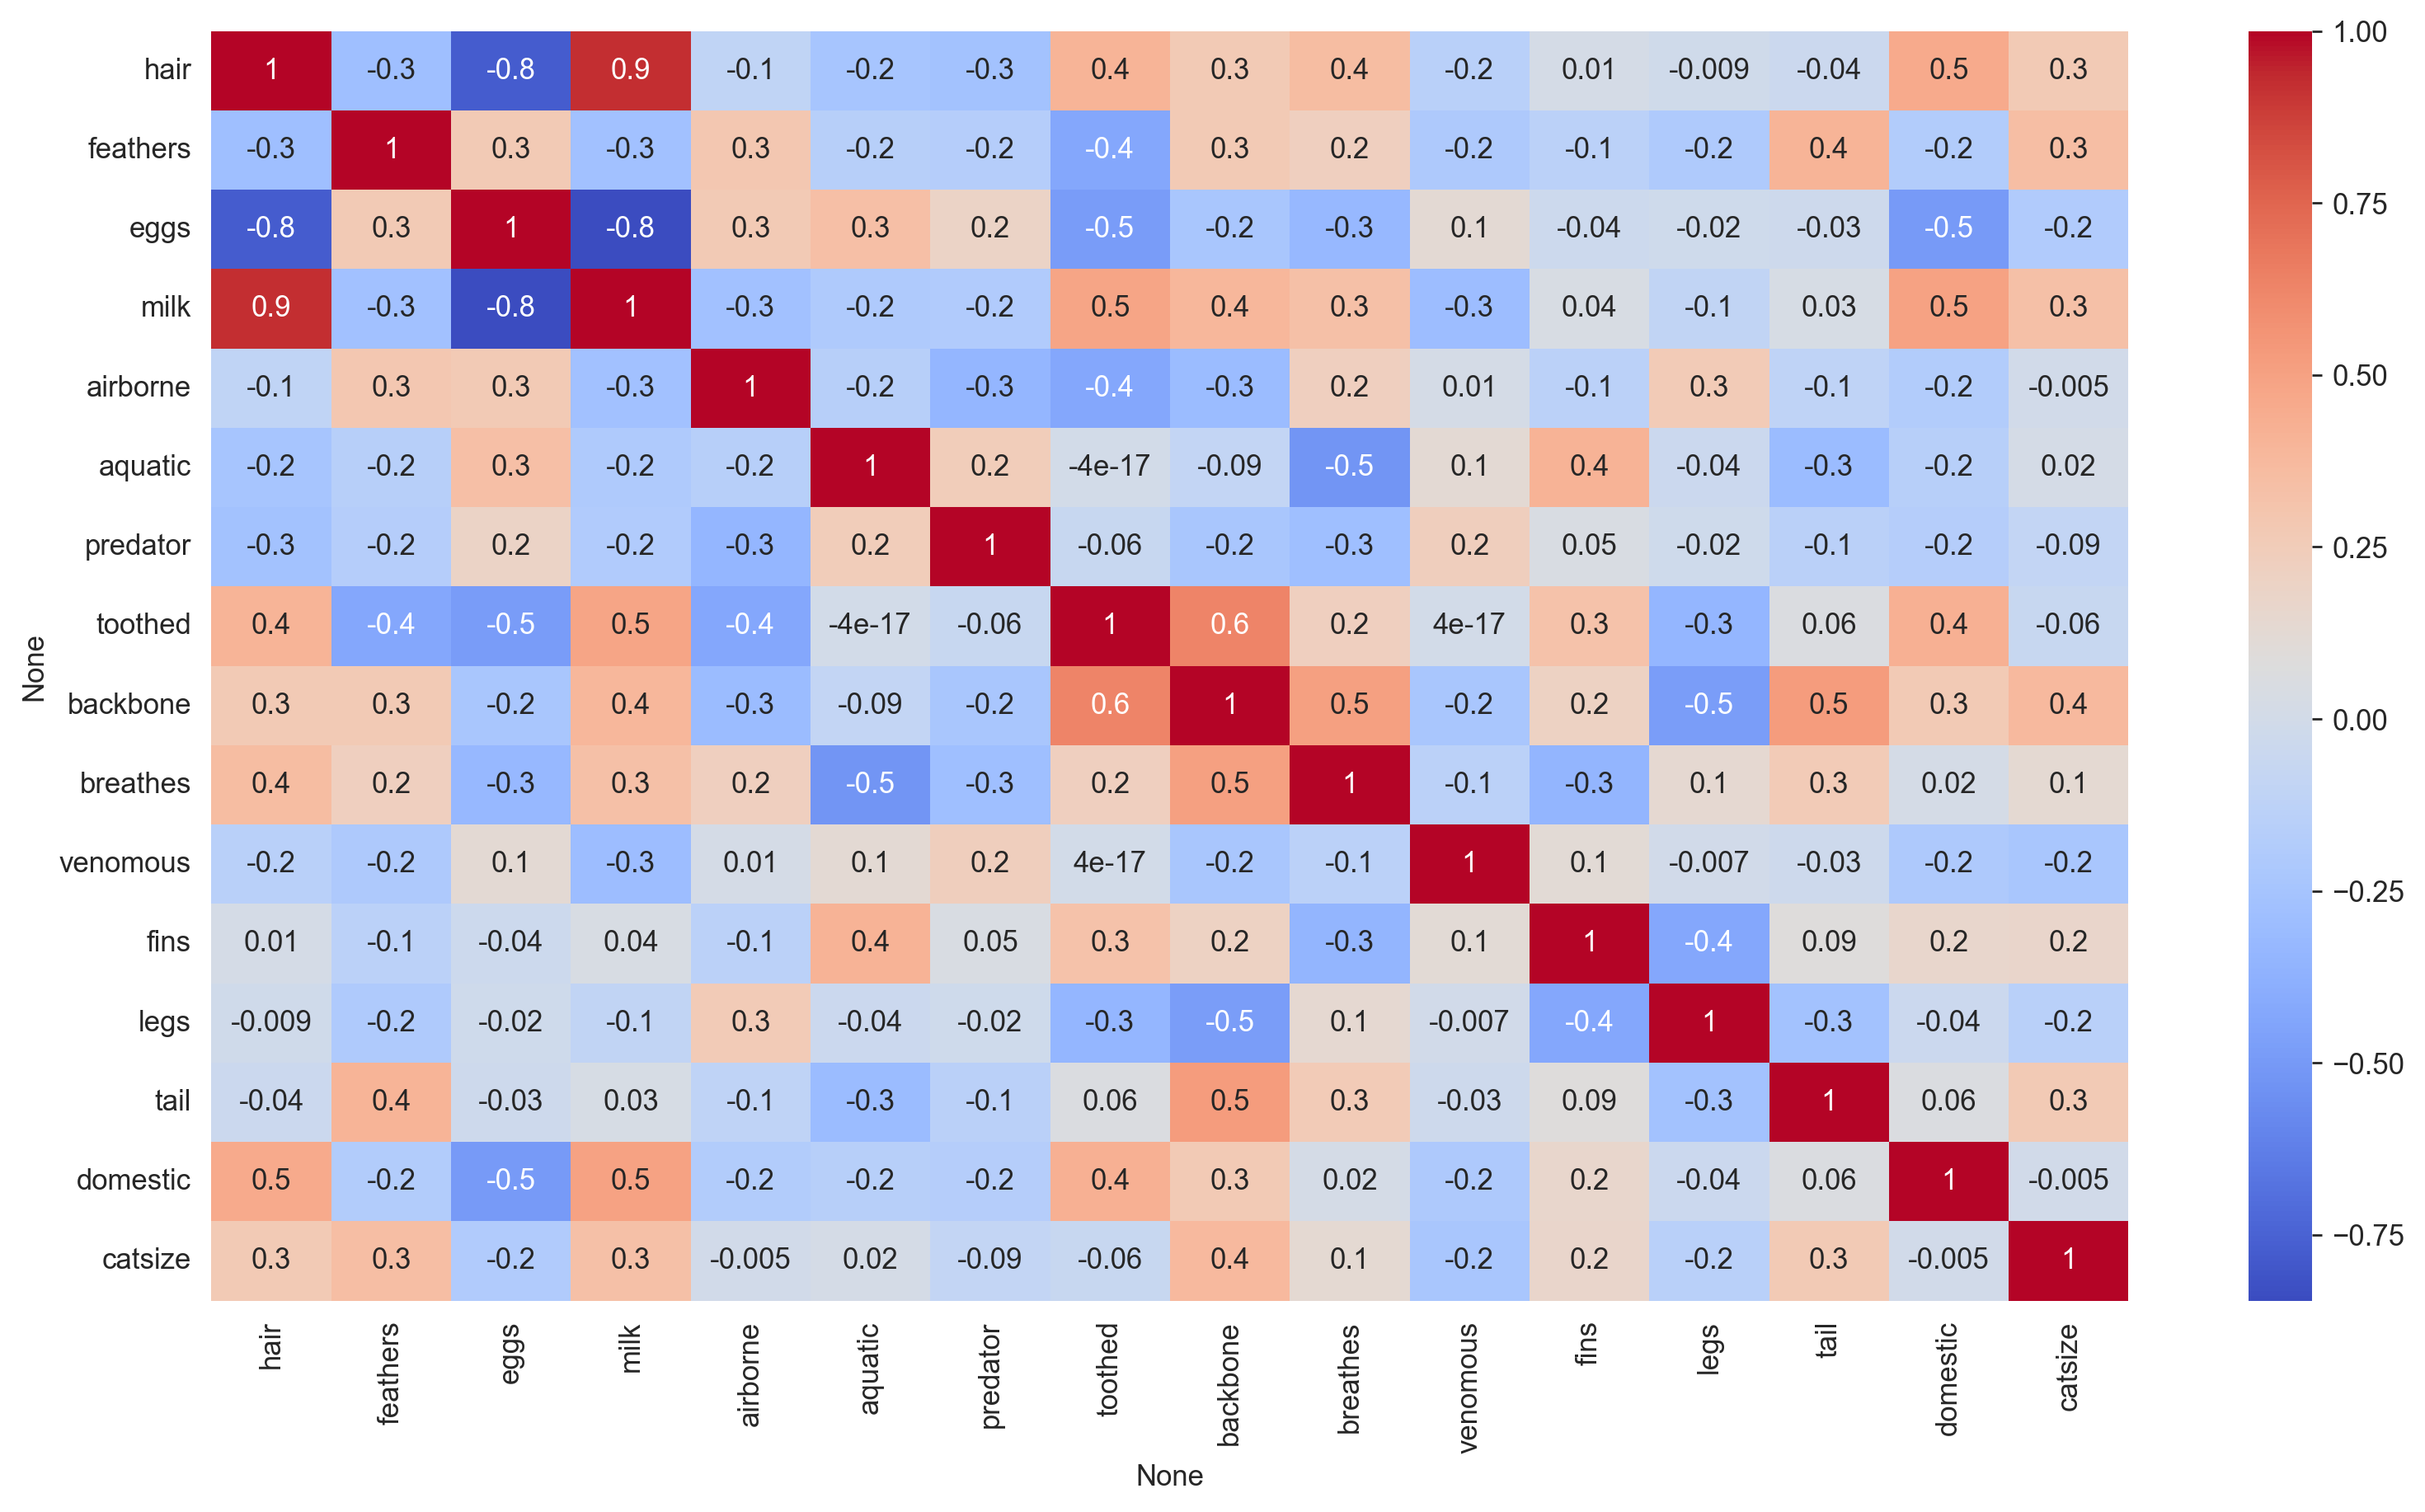

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(xtrain.corr(),annot=True,fmt='.1g',cmap='coolwarm')

In [59]:
xtrain

hair  feathers      eggs      milk  airborne   aquatic  predator   
0   1.48324 -0.430331  0.625543 -0.625543  2.323790 -0.774597 -1.208941  \
1  -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
2   1.48324 -0.430331 -1.598611  1.598611 -0.430331  1.290994  0.827170   
3  -0.67420 -0.430331  0.625543 -0.625543  2.323790 -0.774597 -1.208941   
4  -0.67420  2.323790  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
5  -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
6  -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994 -1.208941   
7   1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597  0.827170   
8  -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
9  -0.67420 -0.430331 -1.598611 -0.625543 -0.430331 -0.774597  0.827170   
10 -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994 -1.208941   
11 -0.67420  2.323790  0.625543 -0.625543  2.323790  1.290994 -1.208941   
12 -0.67420  2.323790  0.625543 -0.625543  2.323790 -0.774597 -1.208941   
13  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597 -1.208941   
14  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597 -1.208941   
15 -0.67420 -0.430331  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
16  1.48324 -0.430331  0.625543  1.598611 -0.430331  1.290994  0.827170   
17 -0.67420 -0.430331  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
18  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597 -1.208941   
19 -0.67420 -0.430331  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
20 -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
21 -0.67420 -0.430331  0.625543 -0.625543 -0.430331 -0.774597 -1.208941   
22 -0.67420  2.323790  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
23 -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
24  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597 -1.208941   
25  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597  0.827170   
26 -0.67420  2.323790  0.625543 -0.625543 -0.430331 -0.774597 -1.208941   
27 -0.67420 -0.430331  0.625543 -0.625543 -0.430331 -0.774597  0.827170   
28 -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
29 -0.67420 -0.430331  0.625543 -0.625543  2.323790 -0.774597  0.827170   
30 -0.67420 -0.430331  0.625543 -0.625543 -0.430331  1.290994  0.827170   
31  1.48324 -0.430331 -1.598611  1.598611 -0.430331 -0.774597 -1.208941   

   toothed  backbone  breathes  venomous      fins      legs      tail   
0     -1.0 -1.598611  0.529150  2.081666 -0.321634  1.315517 -1.064581  \
1      1.0  0.625543  0.529150 -0.480384 -0.321634  0.429274 -1.064581   
2      1.0  0.625543  0.529150 -0.480384  3.109126 -1.343212 -1.064581   
3     -1.0 -1.598611  0.529150 -0.480384 -0.321634  1.315517 -1.064581   
4     -1.0  0.625543  0.529150 -0.480384 -0.321634 -0.456969  0.939336   
5     -1.0 -1.598611 -1.889822 -0.480384 -0.321634  0.872395 -1.064581   
6      1.0  0.625543  0.529150 -0.480384 -0.321634  0.429274 -1.064581   
7      1.0  0.625543  0.529150 -0.480384 -0.321634 -0.456969 -1.064581   
8     -1.0 -1.598611 -1.889822 -0.480384 -0.321634  2.201760 -1.064581   
9     -1.0 -1.598611  0.529150  2.081666 -0.321634  2.201760  0.939336   
10     1.0  0.625543 -1.889822 -0.480384  3.109126 -1.343212  0.939336   
11    -1.0  0.625543  0.529150 -0.480384 -0.321634 -0.456969  0.939336   
12    -1.0  0.625543  0.529150 -0.480384 -0.321634 -0.456969  0.939336   
13     1.0  0.625543  0.529150 -0.480384 -0.321634  0.429274  0.939336   
14     1.0  0.625543  0.529150 -0.480384 -0.321634  0.429274 -1.064581   
15     1.0  0.625543  0.529150 -0.480384 -0.321634 -1.343212  0.939336   
16    -1.0  0.625543  0.529150 -0.480384 -0.321634  0.429274  0.939336   
17    -1.0 -1.598611 -1.889822 -0.480384 -0.321634 -1.343212 -1.064581   
18     1.0  0.625543  0.529150 -0.480384 -0.321634 -0.456969  0.939336   
19     1.0  0.625543  0.529150 -0.480384 -0.321634 

In [60]:
sns.pairplot(xtrain)

## Model Building

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [81]:
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.96875, 0.75)

There seems to be some amount of underfitting in the model.

# Hyperparameter tuning

In [66]:
# Create a list of accuracies for n_neighbours = 1 to 20
train_acc = []
test_acc = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

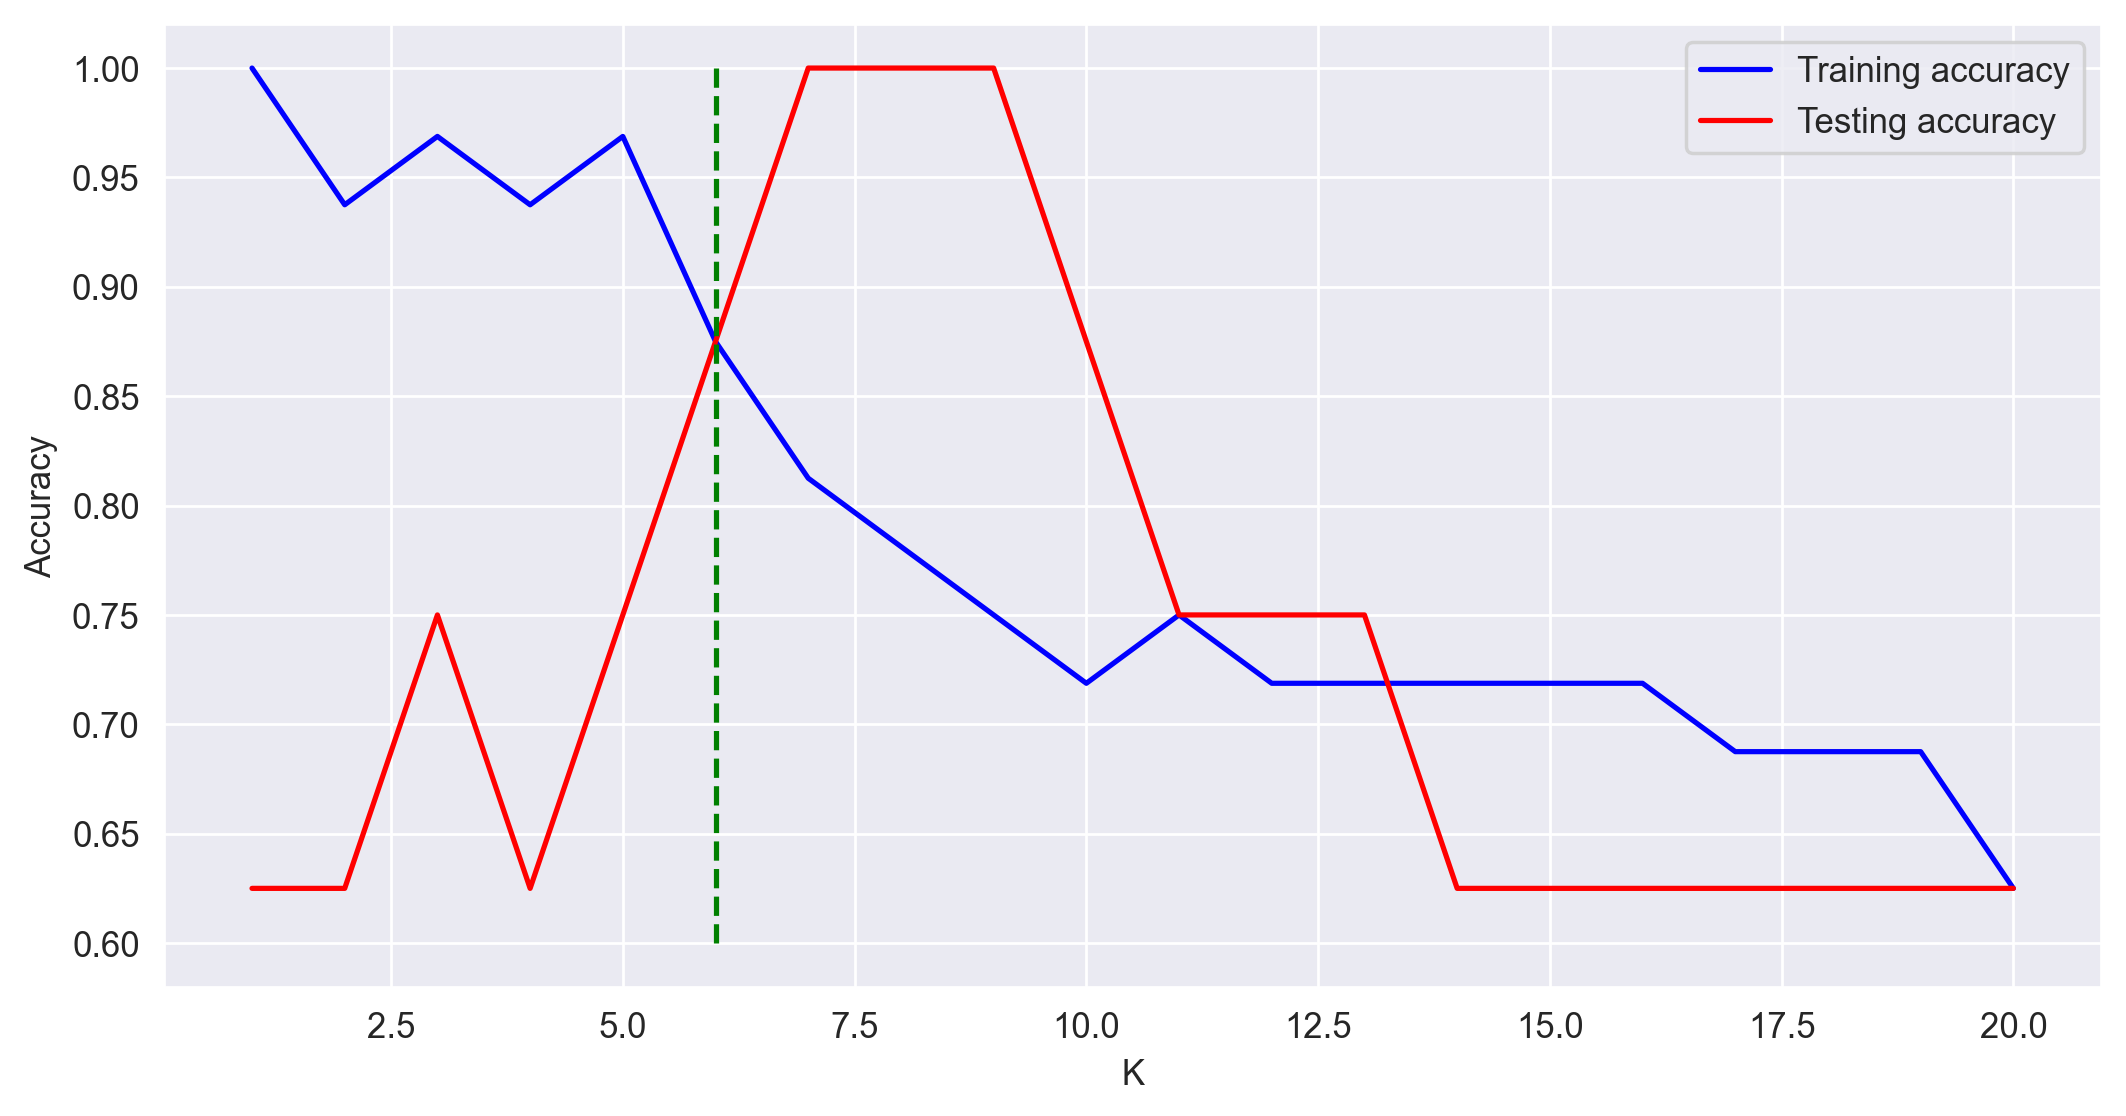

In [74]:
# Plot the accuracies

plt.plot(range(1,21),train_acc,color='blue', label='Training accuracy')
plt.plot(range(1,21),test_acc,color='red', label='Testing accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.vlines(x=6,ymin=0.6,ymax=1,color = 'green', linestyles='dashed')

We observe that the training and testing accuracies for the KNN model appear to be consisitent when **k=6**

In [82]:
# Create the model again with k=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f'Training score: {knn.score(xtrain,ytrain)}\nTesting score: {knn.score(xtest,ytest)}')

Training score: 0.875
Testing score: 0.875


In [83]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.88         8
   macro avg       0.90      0.93      0.89         8
weighted avg       0.94      0.88      0.88         8



In [85]:
xtest['predictions'] = ypred

In [86]:
sns.pairplot(data=xtest,hue='predictions',palette='hls')

### **What are the key hyperparameters in KNN?**
- Number of neighbours
- Distance calculation
- Weights

### **What distance metrics can be used in KNN?**
- Euclidean distance
- Manhattan
- Minkowski
- Hamming